# Homework 8: Phase Portraits and Cycles

***
### Academic honesty statement

**SANTIAGO ORTIZ LAVERDE**

- I state that I worked alone on this assignment. Therefore, I take full responsibility for the academic integrity of the work presented below.
***

## Problem 1: Phase portrait analysis of a chemostat

Question from H.T. Banks and Marie Davidian

A chemostat is a bioreactor where a microbial culture is continuously supplied with nutrients at a fixed rate and concomitantly harvested to keep the culture at a constant concentration. Chemostats are also used as microcosms in ecology and evolutionary biology as well as in wastewater treatment. 

Here, we consider the problem of growth of micro-organisms, for example, a population of bacteria requiring an energy source containing carbon for growth (say a simple sugar). Suppose we have some bacteria in a container, and we add nutrients continuously in this container (i.e., a continuous culture medium). Assume the bacteria's growth depends on a limiting nutrient
alone (i.e., all other nutrients are in excess and other conditions necessary for their growth are adequate). The container has an outlet so that nutrients and bacteria in the container can flow out. We further assume the container is well mixed.

Let:
- V be the volume of the chemost stat and equal to 1$L$.
- Q be the fixed volumetric flow rate and equal to 1 $L/h$.
- q = Q/V be the dilution rate ($h^{-1}$)
- N(t) be the mass of bacteria at time t. 
- c(t) be the concentration of nutrients ($g/L$) and $c_0$ be the concentration of nutrients in the feed line, equal to 8 g/L.
- r be the growth rate of bacteria ($h^{-1}$) where $r(c) = \frac{R_{max}c(t)}{(K_m+c(t))}$. Let $K_m = 4$ and $R_{max}=2$. 
- y is the yield parameter equal to 0.25 $unitless$.

\begin{align}
\dot{N} = rN(t)-qN(t)\\
\dot{c} = qc_0-qc(t)-y^{-1}rN(t)\\
\end{align}

### 1.1 First task
Explain whether the system above is linear or nonlinear.
- The system of ordinary differential equations is nonlinear, simply because it cannot be represented in matrix form. The term that makes the equation nonlinear is r(c).

### 1.2 Second task
Perform a phase plane analysis of this system. Be sure to carefully consider the bounds of your axes. Be sure to add example trajectories to your plot that start at (x_0, y_0) = (1,1), (3,9) and (0.1,0.1).

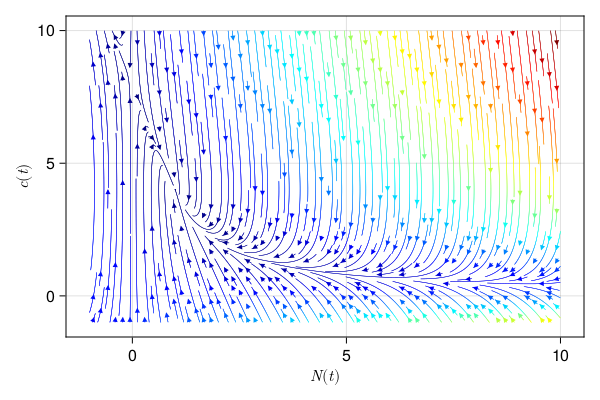

In [1]:
using CairoMakie, LaTeXStrings

V=1; Q=1; c₀=8; Km=4; Rmax=2; y=0.25

function chemostat(N, c; V=V, Q=Q, c0=c₀, Km=Km, Rmax=Rmax, y=y)
    q = Q/V
    r = Rmax*c/(Km + c)
    dNdt = r*N - q*N
    dcdt = q*c0 - q*c - y^-1*r*N
    return Point2f(dNdt, dcdt)
end

odesystem(N, c) = chemostat(N, c; V=1, Q=1, c0=8, Km=4, Rmax=2, y=0.25);

fig = Figure(resolution = (600, 400))
ax = Axis(fig[1, 1], xlabel=L"N(t)", ylabel=L"c(t)", backgroundcolor=:white)
streamplot!(ax, odesystem, -1..10, -1..10, colormap = :jet,
            gridsize = (64, 64), arrow_size=7.0, linewidth = 0.5); fig   # Reverse(:jet)

### 1.3 Second task
Find how many steady states are in the evaluated range.

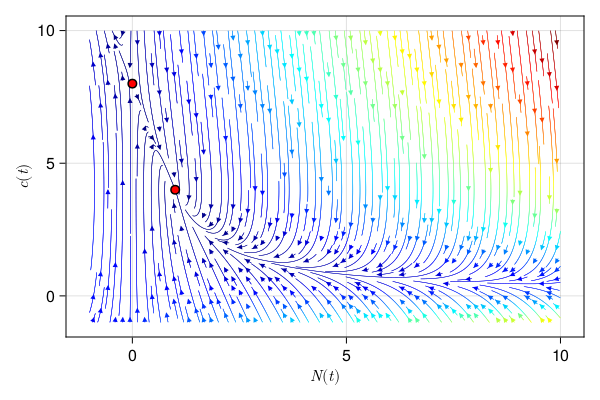

In [2]:
using NLsolve

function chemostat!(F, x; V=1, Q=1, c0=8, Km=4, Rmax=2, y=0.25)
    q = Q/V
    r = Rmax*x[2]/(Km + x[2])
    F[1] = r*x[1] - q*x[1]
    F[2] = q*c0 - q*x[2] - y^-1*r*x[1]
end

results_s1 = nlsolve((F, x)->chemostat!(F, x), [1.0, 5.0])
results_s2 = nlsolve((F, x)->chemostat!(F, x), [0.0, 10.0])

zero1 = results_s1.zero; zero2 = results_s2.zero;
Ncx = [zero1[1], zero2[1]]; Ncy = [zero1[2], zero2[2]];
scatter!(ax, Ncx, Ncy; color=:red, markersize=12, strokewidth=1.5); fig

1.3.1 How many steadystates exists?
- There are two steadystates in the space analyzed.
1.3.2 Under what starting conditions do we expect our chemostat to overshoot the steadystate concentration of nutrients?
- A narrow range of initial conditions will lead to that steady state (every condition with a bacterial concentration of zero). One example is With a starting condition of $N_0=0.0$ and $c_0=9.0$
1.3.3 Under what starting conditions do we expect our chemostat to overshoot the steadystate concentration of bacteria?
- All starting conditions in the phase plot with non-zero bacterial concentration will lead to that steady state. For example with a starting condition of $N_0=1.0$ and $c_0=5.0$.

### 1.4 Fourth task
Perform an eigenvalue and eigenvector analysis on both. Add a point to your phase portrait indicating if the steadystate is stable (closed point) or unstable (open point). And add arrows indicating the directions of the corresponding eigenvectors. Make the length of the arrows correspond to the size of the eigenvalue.

Note that for an unstable node, the arrows should point away. For a stable node or direction, the arrows should point towards the node.

\begin{align}
f \approx \frac{R_{max}c(t)}{K_m+c(t)} N(t) - q N(t)
\end{align}

\begin{align}
\frac{\partial{f}}{\partial{N}} = \frac{R_{max}c(t)}{K_m+c(t)} - q
\text{ }\text{ }\text{ ; }\text{ }\text{ }
\frac{\partial{f}}{\partial{c}} = \frac{R_{max}(K_m+c(t)) - R_{max}c(t)}{(K_m+c(t))^2} N(t)
\end{align}

\begin{align}
\text{ }
\end{align}

\begin{align}
g \approx qc_0 - qc(t) - y^{-1} \frac{R_{max}c(t)}{K_m+c(t)} N(t)\\
\end{align}

\begin{align}
\frac{\partial{g}}{\partial{N}} = - y^{-1}\frac{R_{max}c(t)}{K_m+c(t)}
\text{ }\text{ }\text{ ; }\text{ }\text{ }
\frac{\partial{g}}{\partial{c}} = - q -y^{-1}\frac{R_{max}(K_m+c(t)) - R_{max}c(t)}{(K_m+c(t))^2} N(t)\end{align}

\begin{align}
\text{ }
\end{align}

$$\text{eigen}(J); \text{ where  } J = \begin{bmatrix} \frac{\partial{f}}{\partial{N}} & \frac{\partial{f}}{\partial{c}} \\ \frac{\partial{g}}{\partial{N}} & \frac{\partial{g}}{\partial{c}} \end{bmatrix}$$

In [3]:
using LinearAlgebra

function Jacobian(zero)
    c, N = zero
    dfdN = Rmax*c/(Km + c)
    dfdc = (Rmax*(Km + c) - Rmax*c)/(Km + c)^2 * N
    dgdN = -(y^-1)*Rmax*c/(Km + c)
    dgdc = -Q/V -(y^-1)*(Rmax*(Km + c) - Rmax*c)/(Km + c)^2 * N
    [dfdN dfdc; dgdN dgdc]
end;

Eigen_zero1 = eigen(Jacobian(zero1))
vl1 = Eigen_zero1.values
vc1 = Eigen_zero1.vectors
println("Steady state 1 - Values: ", vl1)
println("Steady state 1 - vectors: $([vc1[1, 1], vc1[2, 1]]) & $([vc1[1, 2], vc1[2, 2]])")

Eigen_zero2 = eigen(Jacobian(zero2))
vl2 = Eigen_zero2.values
vc2 = Eigen_zero2.vectors
println("Steady state 1 - Values: ", vl2)
println("Steady state 1 - vectors: $([vc2[1, 1], vc2[2, 1]]) & $([vc2[1, 2], vc2[2, 2]])")

Steady state 1 - Values: [-5.789095422365252, 0.06909542352754006]
Steady state 1 - vectors: [-0.20252935835419988, 0.9792761913804686] & [0.9681707259023224, -0.25029072197300867]
Steady state 1 - Values: [-16.999999999976875, 0.0]
Steady state 1 - vectors: [-0.22903933372552882, 0.9734171683335803] & [1.0, 0.0]


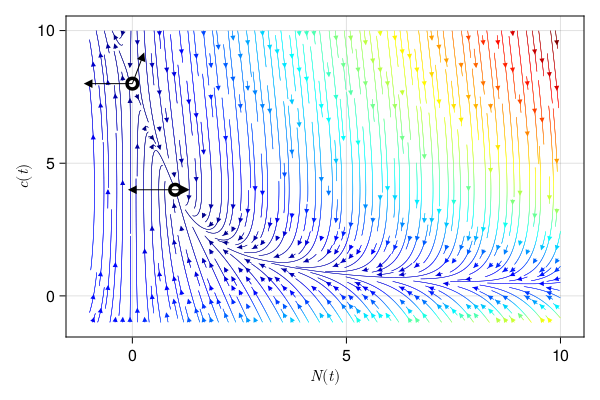

In [4]:
using Makie

u1 = [vc1[1, 1], vc1[1, 2]]
v1 = [vc1[2, 1], vc1[2, 2]]
u2 = [vc2[1, 1], vc2[1, 2]]
v2 = [vc2[2, 1], vc2[2, 2]];

fig_cd = Figure(resolution = (600, 400))
ax_cd = Axis(fig_cd[1, 1], xlabel=L"N(t)", ylabel=L"c(t)", backgroundcolor=:white)
streamplot!(ax_cd, odesystem, -1..10, -1..10, colormap = :jet,
            gridsize = (64, 64), arrow_size=7.0, linewidth = 0.5)
scatter!(ax_cd, Ncx, Ncy; color=:white, markersize=15, strokewidth=3.5)
arrows!(ax_cd, [zero1[1], zero1[1]], [zero1[2], zero1[2]], u1, v1, lengthscale = [-1, 0.0])
arrows!(ax_cd, [zero2[1], zero2[1]], [zero2[2], zero2[2]], u2, v2, lengthscale = [-1, 1])
fig_cd

***